In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\Day 7\Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
x = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

## WIthout using LDa

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [7]:
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
0.9166666666666666


## Using LDa

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
lda = LDA(n_components=2)

x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [11]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
0.9722222222222222


# Ploting scatter for wine dataset

In [13]:
pdf = pd.DataFrame(data = lda.fit_transform(x_train, y_train), columns=["LDa1", "LDa2"])
pdf.head()

,LDa1,LDa2
0,3.573156,1.940189
1,0.854759,-2.081830
2,0.621737,-3.062345
3,4.807864,2.006387
4,-3.857976,0.149873


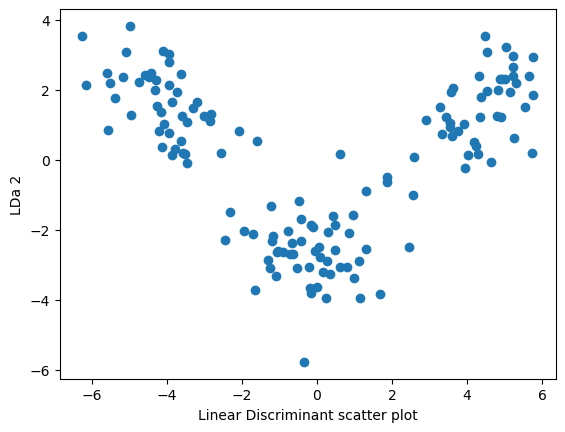

In [14]:
plt.scatter(x=pdf['LDa1'], y=pdf['LDa2'])
plt.xlabel("LDa 1")
plt.ylabel("LDa 2")
plt.xlabel("Linear Discriminant scatter plot")
plt.show()

# With QDa

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [16]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
x = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [21]:
#classifier = GaussianNB()
#classifier.fit(x_train, y_train)

In [22]:
y_pred = qda.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
1.0
